In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:/jupyter/online_shoppers_intention.csv")
#https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

In [3]:
#DATA CLEANING

In [4]:
print(data.tail)

<bound method NDFrame.tail of        Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0            

In [5]:
data.shape

(12330, 18)

In [6]:
print(data['Month'].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


In [7]:
#Replace month names with numbers
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
data['Month'] = data['Month'].map(month_map)

In [8]:
print(data['VisitorType'].unique())

['Returning_Visitor' 'New_Visitor' 'Other']


In [9]:
#Replace string values with numbers 
visitor_type = {'New_Visitor':0, 'Returning_Visitor':1, 'Other':2 }
data['VisitorType'] = data['VisitorType'].map(visitor_type)

In [10]:
#Replace True/False with binary values
data['Weekend'] = data['Weekend'].astype(int)
data['Revenue'] = data['Revenue'].astype(int)

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
#EXPLORATORY DATA ANALYSIS

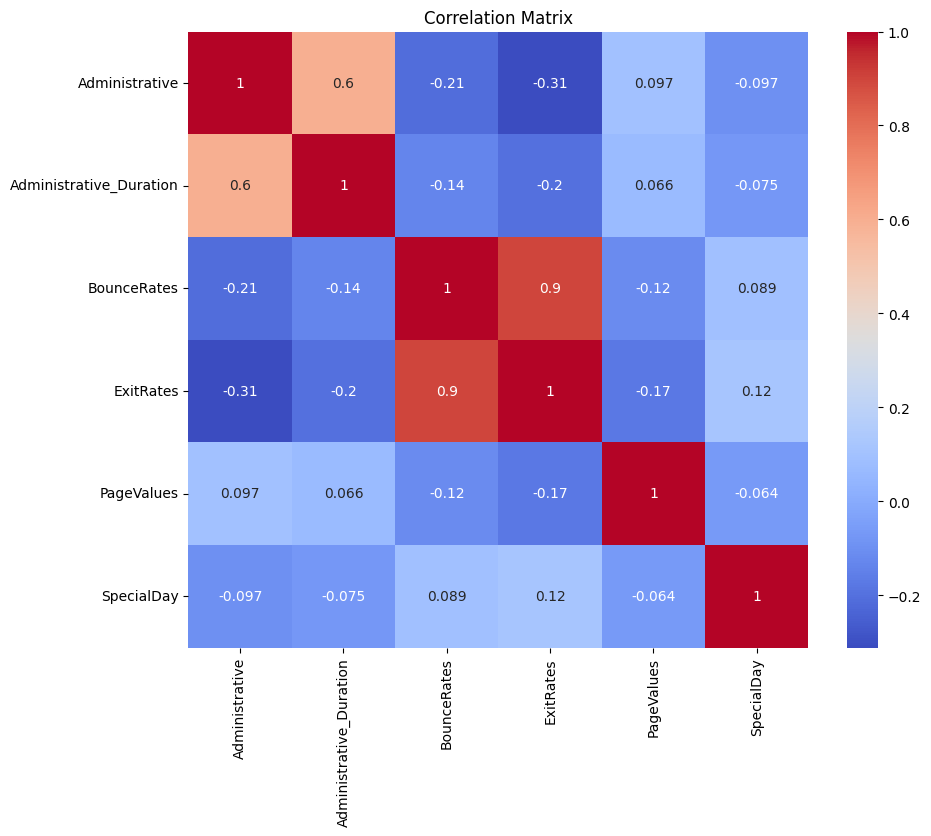

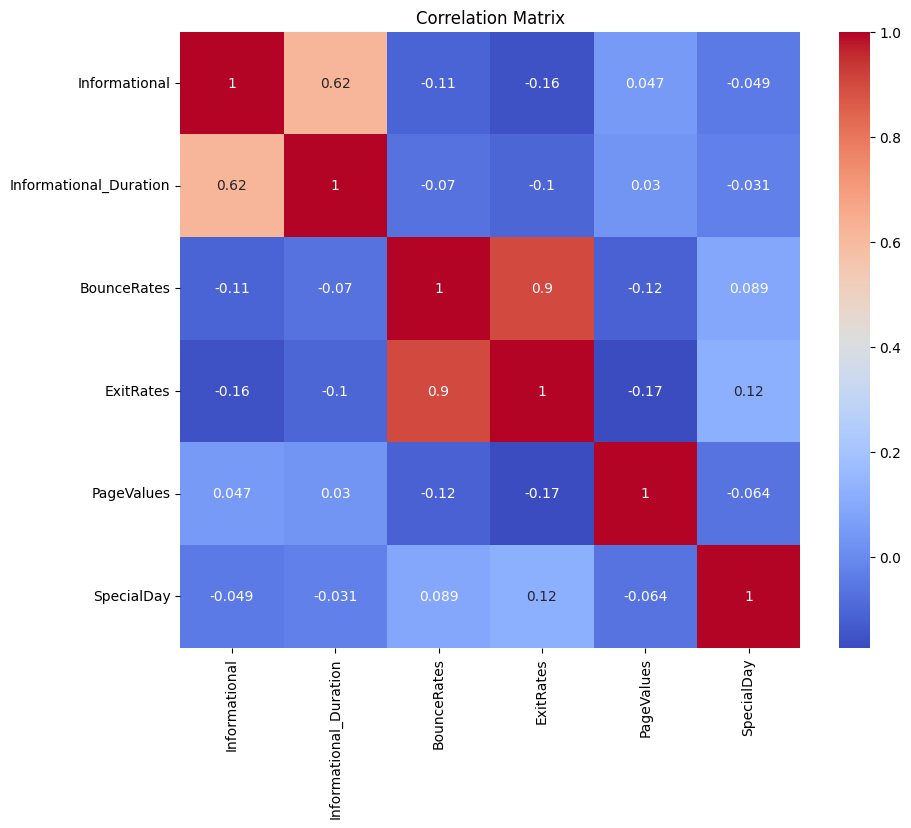

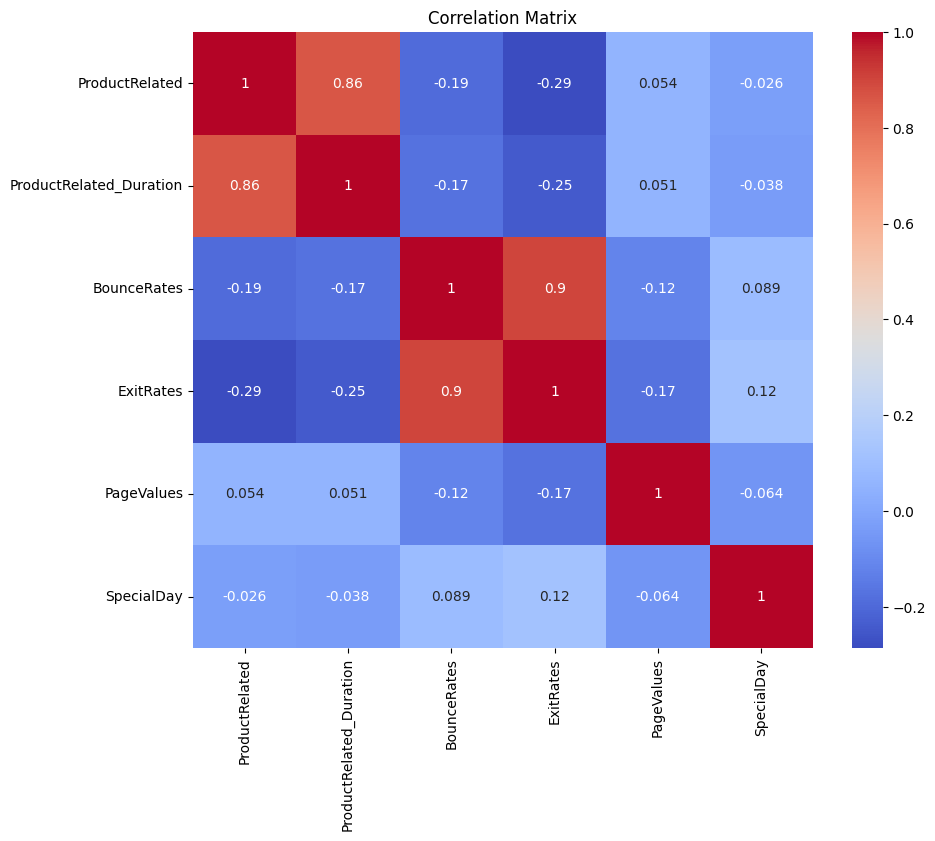

In [13]:
administrative_columns = [
    'Administrative', 'Administrative_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]
informational_columns = ['Informational', 'Informational_Duration',  
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]

product_columns = ['ProductRelated', 'ProductRelated_Duration', 
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]
subset_data = data[administrative_columns]
plt.figure(figsize=(10, 8))
sns.heatmap(subset_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
subset_data = data[informational_columns]
plt.figure(figsize=(10, 8))
sns.heatmap(subset_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
subset_data = data[product_columns]
plt.figure(figsize=(10, 8))
sns.heatmap(subset_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

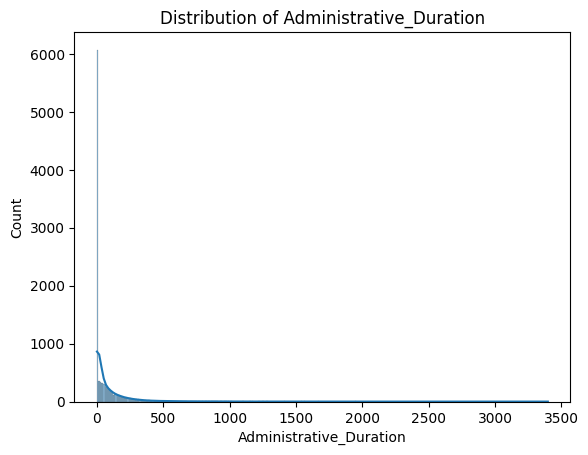

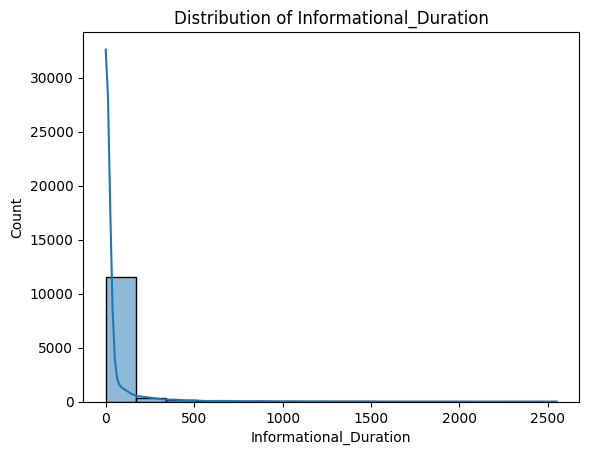

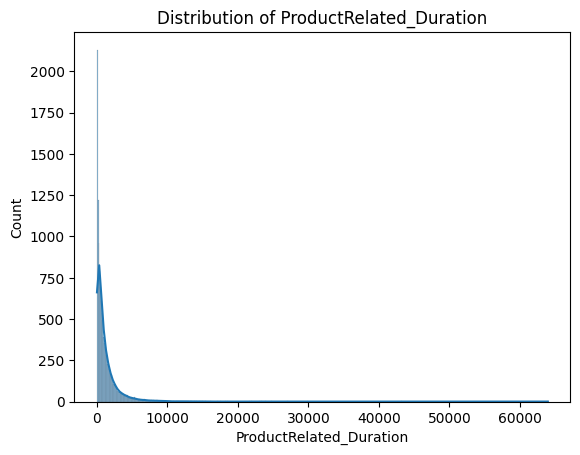

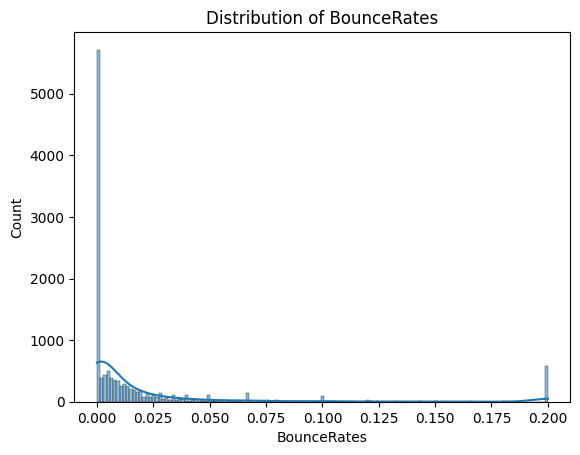

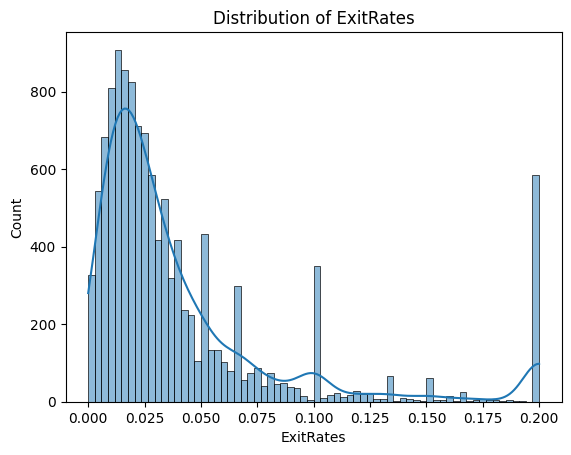

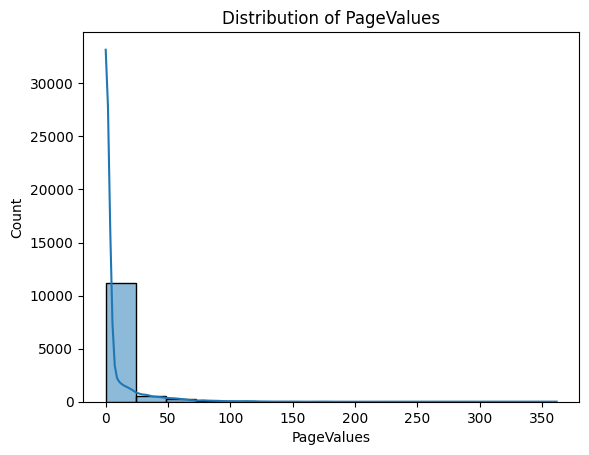

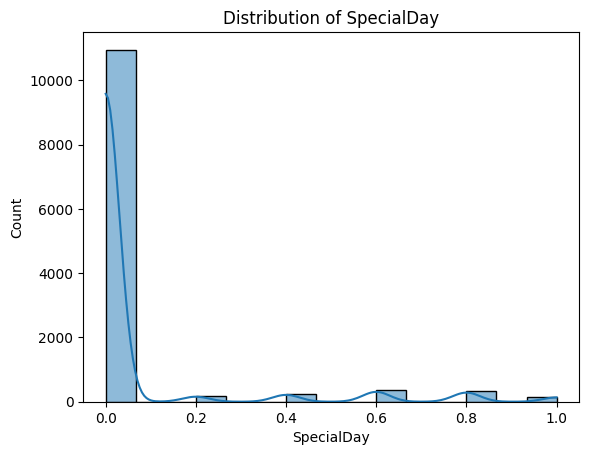

In [14]:
numerical_cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
                  'SpecialDay',]
for col in numerical_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

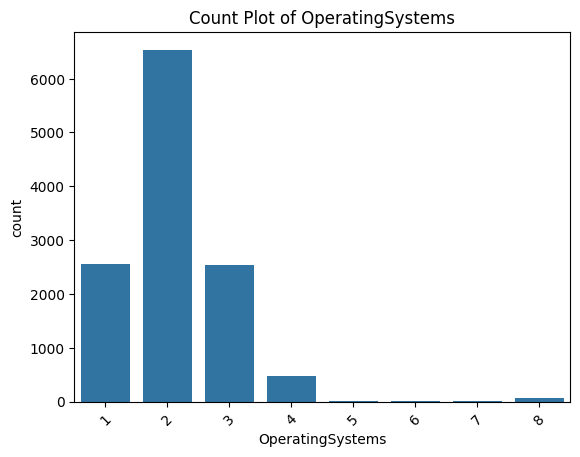

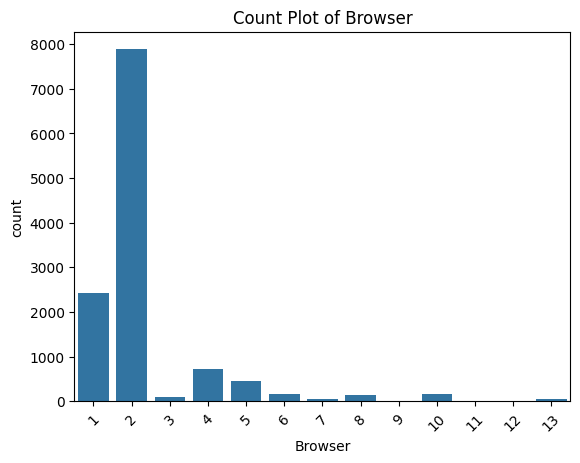

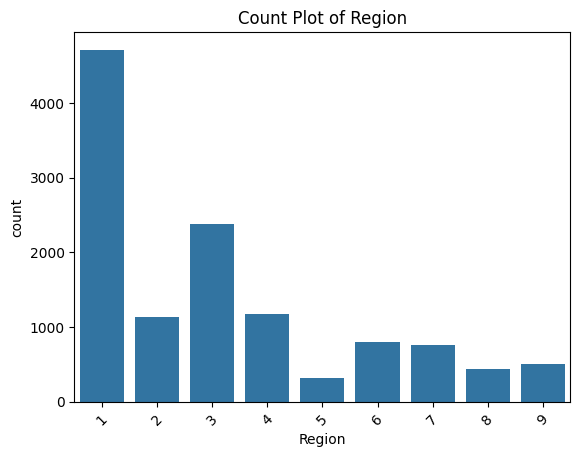

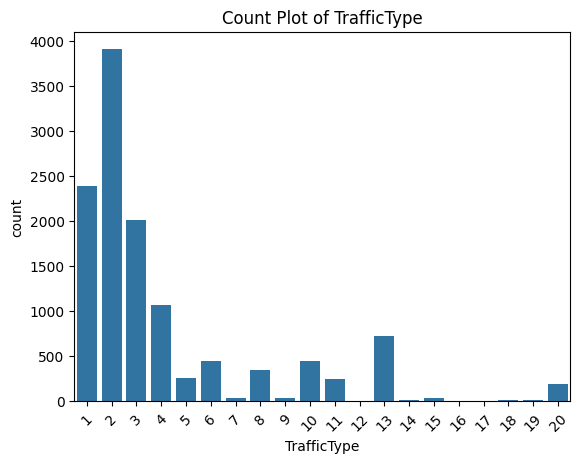

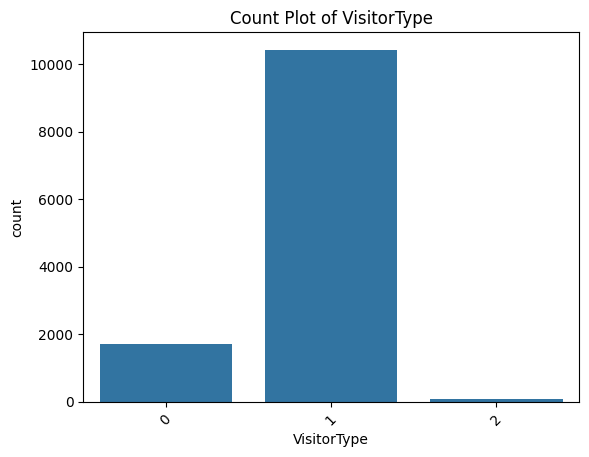

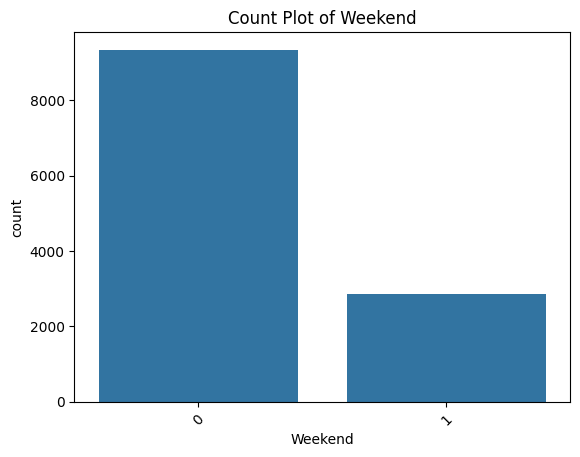

In [15]:
categorical_cols = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
for col in categorical_cols:
    sns.countplot(x=data[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()


In [16]:
for col in categorical_cols:
    pivot = data.pivot_table(index=col, columns='Revenue', aggfunc='size', fill_value=0)
    print(pivot)

Revenue              0     1
OperatingSystems            
1                 2170   379
2                 5386  1155
3                 2262   268
4                  393    85
5                    5     1
6                   17     2
7                    6     1
8                   58    17
Revenue     0     1
Browser            
1        2062   365
2        6660  1223
3         100     5
4         601   130
5         379    86
6         154    20
7          43     6
8         114    21
9           1     0
10        131    32
11          5     1
12          7     3
13         40    16
Revenue     0    1
Region            
1        3943  771
2         940  188
3        2030  349
4         996  175
5         266   52
6         689  112
7         639  119
8         375   56
9         419   86
Revenue         0    1
TrafficType           
1            2126  262
2            3064  847
3            1833  180
4             901  165
5             204   56
6             390   53
7              28

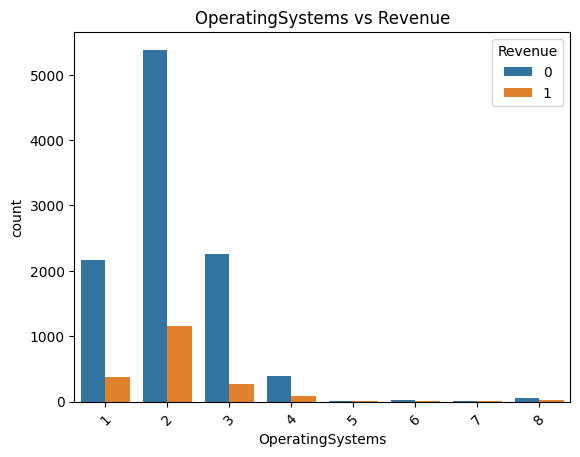

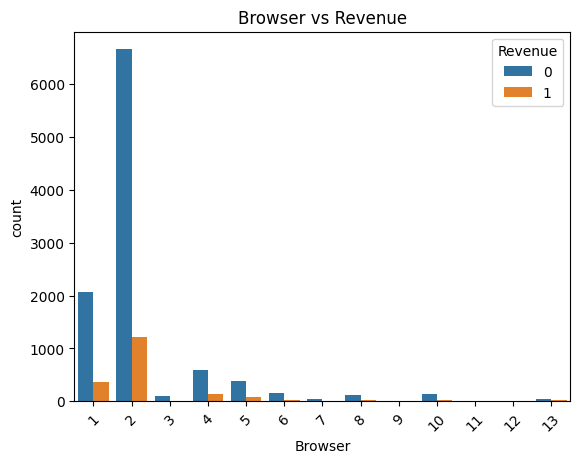

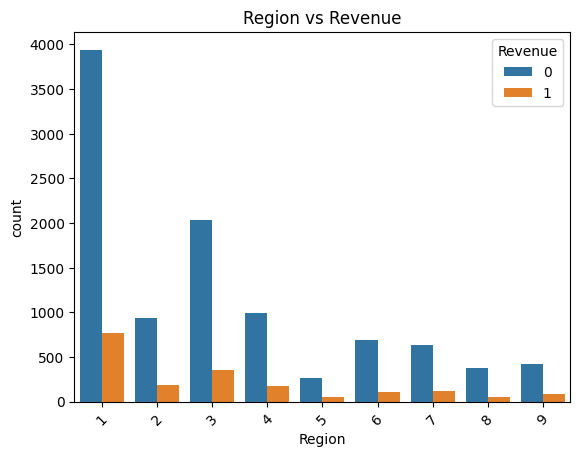

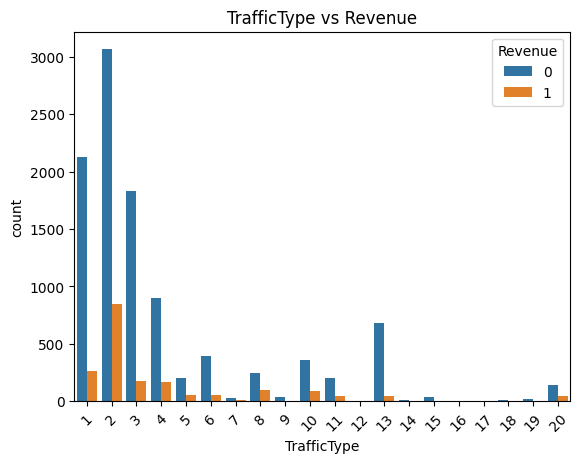

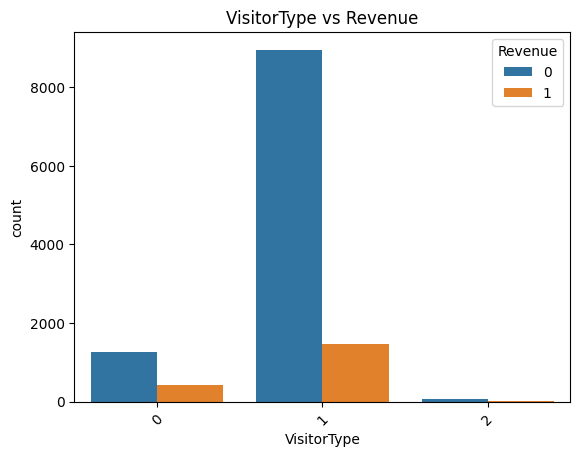

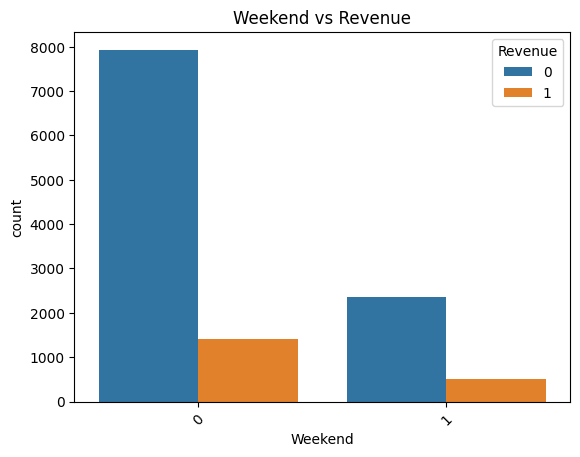

In [17]:
for col in categorical_cols:
    sns.countplot(x=data[col], hue=data['Revenue'])
    plt.title(f"{col} vs Revenue")
    plt.xticks(rotation=45)
    plt.show()

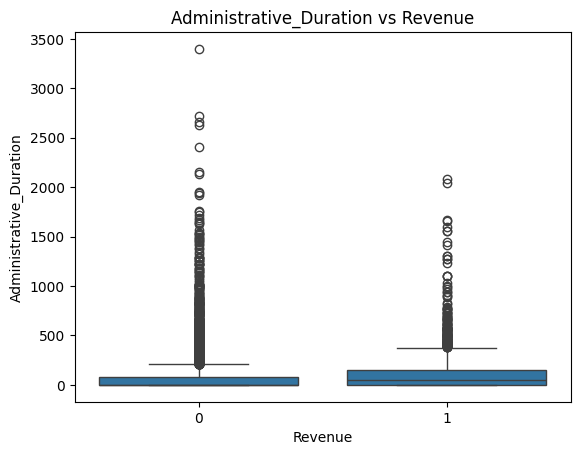

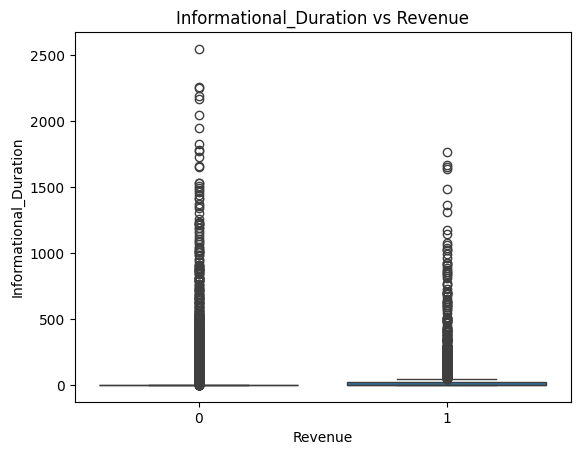

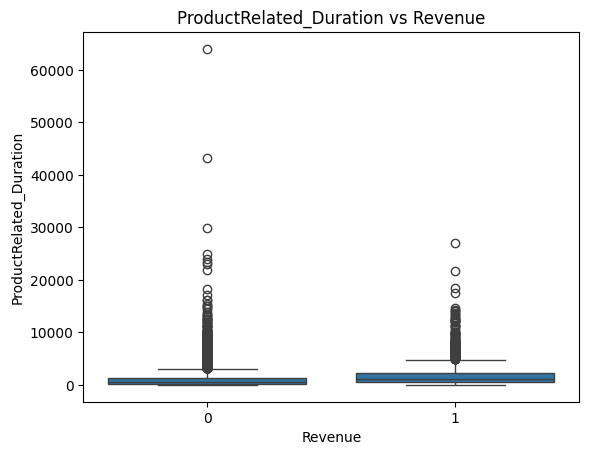

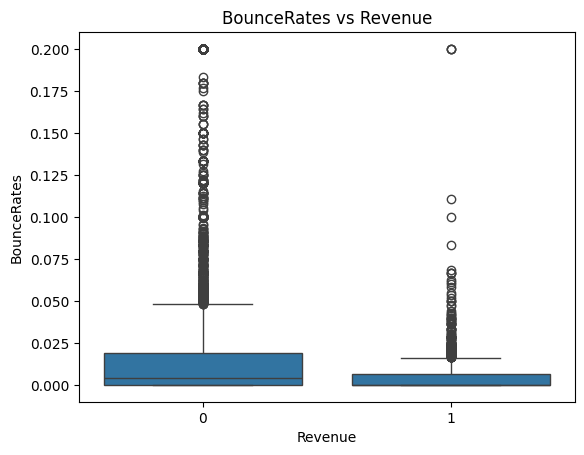

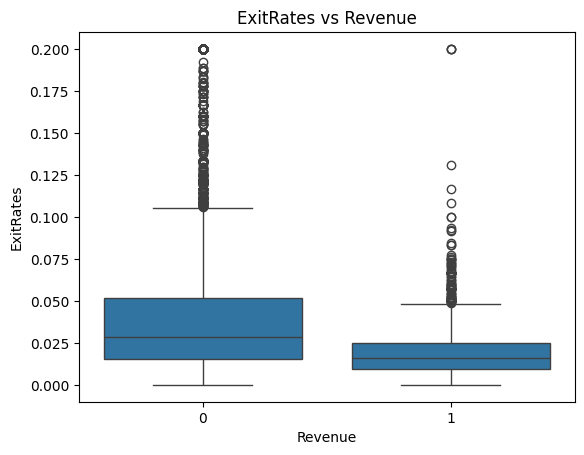

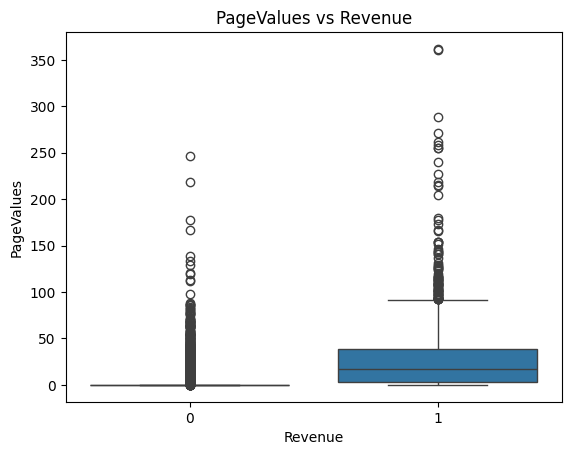

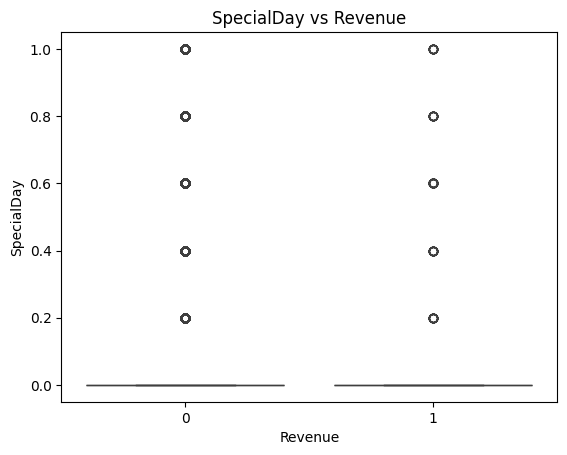

In [18]:
for col in numerical_cols:
    sns.boxplot(x=data['Revenue'], y=data[col])
    plt.title(f"{col} vs Revenue")
    plt.show()

In [19]:
print(data.groupby('Revenue')[numerical_cols].mean())


         Administrative_Duration  Informational_Duration  \
Revenue                                                    
0                      74.635276               30.603289   
1                     119.483244               57.611427   

         ProductRelated_Duration  BounceRates  ExitRates  PageValues  \
Revenue                                                                
0                    1082.976881     0.023197   0.045526    1.999985   
1                    1876.209615     0.005117   0.019555   27.264518   

         SpecialDay  
Revenue              
0          0.069127  
1          0.023166  


In [20]:
from scipy.stats import pointbiserialr

for col in numerical_cols:
    correlation, p_value = pointbiserialr(data[col], data['Revenue'].apply(lambda x: 1 if x else 0))
    print(f"Correlation between {col} and Revenue: {correlation}")

Correlation between Administrative_Duration and Revenue: 0.09176750270471318
Correlation between Informational_Duration and Revenue: 0.0693575266672154
Correlation between ProductRelated_Duration and Revenue: 0.15007699306503225
Correlation between BounceRates and Revenue: -0.14509110030800823
Correlation between ExitRates and Revenue: -0.20432017288175947
Correlation between PageValues and Revenue: 0.4918939788764448
Correlation between SpecialDay and Revenue: -0.08360117263786473


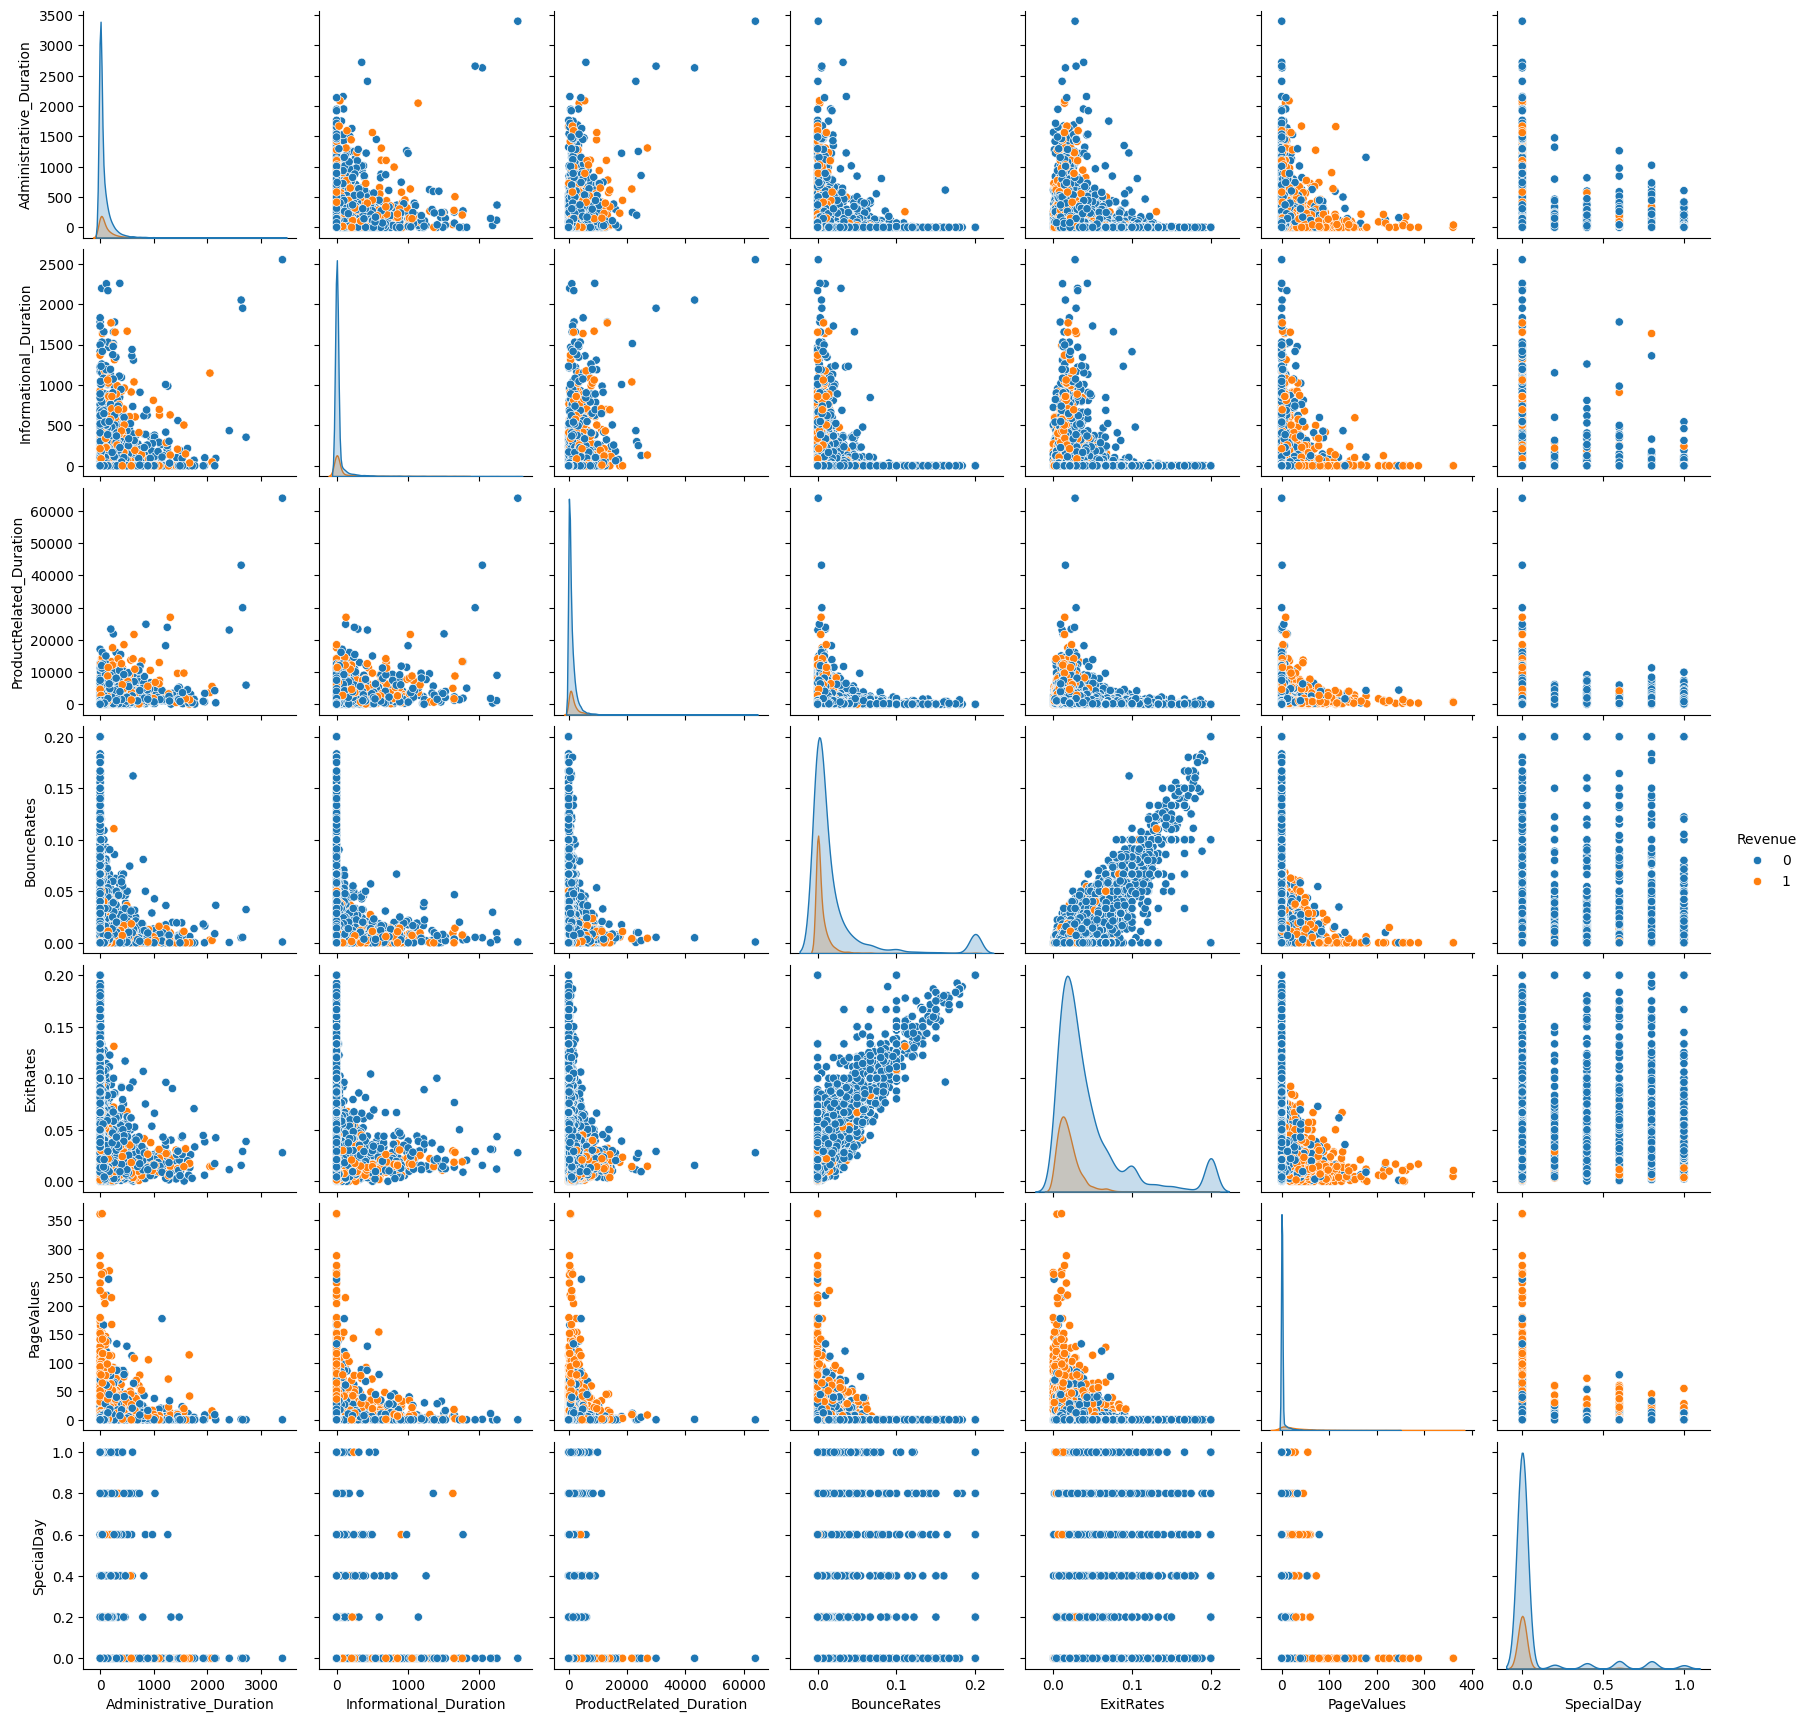

In [21]:
#sns.pairplot(data, hue='Revenue', vars=numerical_cols)
#plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [26]:
X = data.drop(columns=['Revenue'])
y = data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [40]:
logistic_model  = LogisticRegression(random_state=42)
logistic_model .fit(X_train, y_train)
y_pred = logistic_model .predict(X_test)
print("Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Results:
Accuracy: 0.8861122490782466
Confusion Matrix:
 [[2034   45]
 [ 233  129]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      2079
           1       0.74      0.36      0.48       362

    accuracy                           0.89      2441
   macro avg       0.82      0.67      0.71      2441
weighted avg       0.87      0.89      0.87      2441



In [41]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Results:
Accuracy: 0.9029086439983613
Confusion Matrix:
 [[2004   75]
 [ 162  200]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      2079
           1       0.73      0.55      0.63       362

    accuracy                           0.90      2441
   macro avg       0.83      0.76      0.79      2441
weighted avg       0.90      0.90      0.90      2441



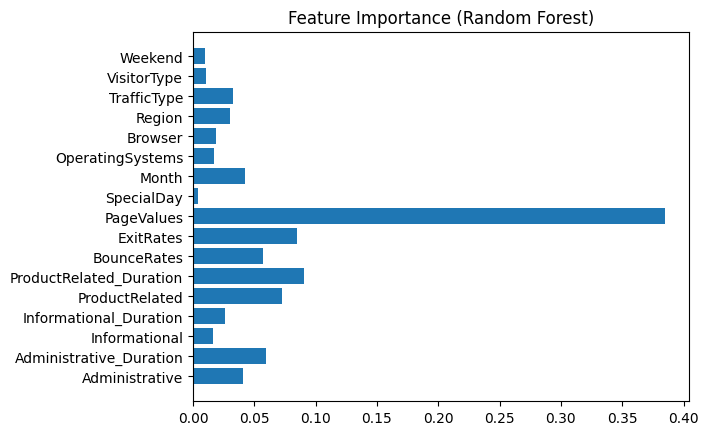

In [42]:
feature_importances = rf_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [43]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Results:
Accuracy: 0.8943056124539124
Confusion Matrix:
 [[2021   58]
 [ 200  162]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2079
           1       0.74      0.45      0.56       362

    accuracy                           0.89      2441
   macro avg       0.82      0.71      0.75      2441
weighted avg       0.88      0.89      0.88      2441



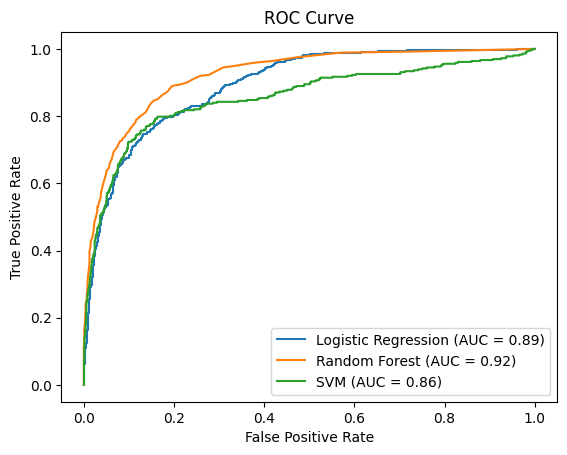

In [44]:
from sklearn.metrics import roc_curve, auc
models = {'Logistic Regression': logistic_model, 
          'Random Forest': rf_model, 
          'SVM': svm_model}

for model_name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1] 
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
